# Mental Rotation Research: 2024-2025 Analysis

Analysis of recent mental rotation publications from 2024-2025.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load the complete dataset
with open('../data/mental_rotation_complete_20251123_133107.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(f"Total articles: {len(df)}")
print(f"Years covered: {sorted(df['search_year'].unique())}")
df.head()

Total articles: 280
Years covered: [np.int64(2024), np.int64(2025)]


,title,url,authors,publication,year,abstract,citations,related_url,page,position,search_year
0,Visual working memory as the substrate for men...,https://link.springer.com/article/10.3758/s134...,"WM Ebert, L Jost, P Jansen, B Stevanovski… - P...",Springer,N/A,… not apply to mental rotation in general but ...,6,/scholar?q=related:riBPmNuD60wJ:scholar.google...,1,1,2025
1,Long-term cognitive and neurophysiological eff...,https://www.nature.com/articles/s41539-025-003...,"L Dong, Y Ke, X Zhu, S Liu, D Ming - npj Scien...",nature.com,N/A,… This study examined the lasting effects of a...,1,/scholar?q=related:76KnItAMHJ8J:scholar.google...,1,2,2025
2,Enhancing cognitive fit: Exploring the potenti...,https://www.tandfonline.com/doi/abs/10.1080/10...,"Z Piri, G Kaplan, K Cagiltay - International J...",Taylor & Francis,N/A,… mental rotation ability and investigates use...,4,/scholar?q=related:c8JjBSgpcXsJ:scholar.google...,1,3,2025
3,Mental rotation is a weak measure of people's ...,https://www.sciencedirect.com/science/article/...,"DH Arnold, LN Bouyer, BW Saurels, E Pellicano…...",Elsevier,N/A,In mental rotation (MR) tasks people can be as...,0,/scholar?q=related:jhUOv204LfUJ:scholar.google...,1,4,2025
4,Inducing strategies to solve a mental rotation...,https://www.tandfonline.com/doi/abs/10.1080/00...,"LM Fernández-Méndez, L Cepero Amores… - The Jo...",Taylor & Francis,N/A,… The main goal of this study was to explore w...,1,/scholar?q=related:LiKfEpGms3oJ:scholar.google...,1,5,2025


## Basic Statistics

In [3]:
# Year distribution
year_counts = df['search_year'].value_counts().sort_index()
print("Articles per year:")
print(year_counts)

# Citation statistics
df['citations'] = pd.to_numeric(df['citations'], errors='coerce').fillna(0)
print(f"\nCitation statistics:")
print(df['citations'].describe())

Articles per year:
search_year
2024     50
2025    230
Name: count, dtype: int64

Citation statistics:
count    280.000000
mean       1.600000
std        3.987975
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       41.000000
Name: citations, dtype: float64


## Visualizations

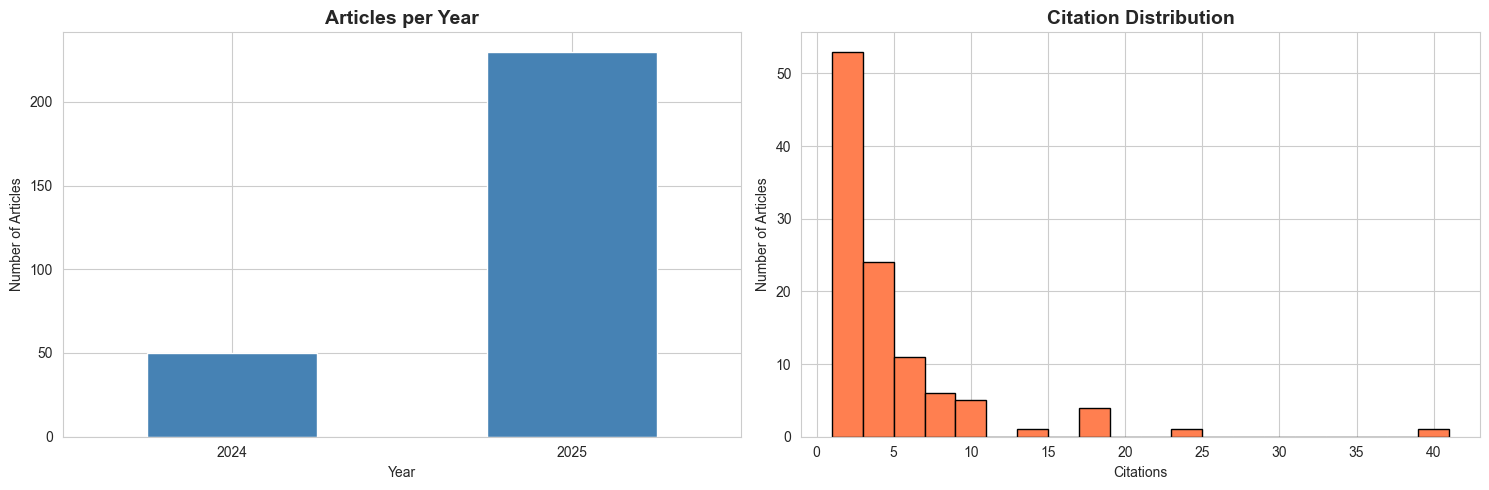

In [4]:
# Articles per year
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
year_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Articles per Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Articles')
axes[0].tick_params(axis='x', rotation=0)

# Citation distribution
df[df['citations'] > 0]['citations'].hist(bins=20, ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Citation Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Citations')
axes[1].set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()

## Top Cited Papers

In [5]:
# Top 10 most cited papers
top_cited = df.nlargest(10, 'citations')[['title', 'authors', 'year', 'citations', 'url']]
print("Top 10 Most Cited Papers:")
for idx, row in top_cited.iterrows():
    print(f"\n{row['citations']} citations")
    print(f"  Title: {row['title'][:80]}...")
    print(f"  Authors: {row['authors'][:60]}...")
    print(f"  Year: {row['year']}")

Top 10 Most Cited Papers:

41 citations
  Title: Slower but more accurate mental rotation performance in aphantasia linked to dif...
  Authors: L Kay, R Keogh, J Pearson - Consciousness and cognition, 202...
  Year: N/A

23 citations
  Title: Exploring the effectiveness of augmented reality in enhancing spatial reasoning ...
  Authors: AA Supli, X Yan - Education and information technologies, 20...
  Year: N/A

18 citations
  Title: Attentional, anticipatory and spatial cognition fluctuate throughout the menstru...
  Authors: F Ronca, JM Blodgett, G Bruinvels, M Lowery… - Neuropsycholo...
  Year: N/A

18 citations
  Title: Attentional, anticipatory and spatial cognition fluctuate throughout the menstru...
  Authors: F Ronca, JM Blodgett, G Bruinvels, M Lowery… - Neuropsycholo...
  Year: N/A

17 citations
  Title: The influence of the design of mental rotation trials on performance and possibl...
  Authors: L Jost, P Jansen - Quarterly Journal of Experimental …, 2024...
  Year: N/A

17 

## Keyword Analysis

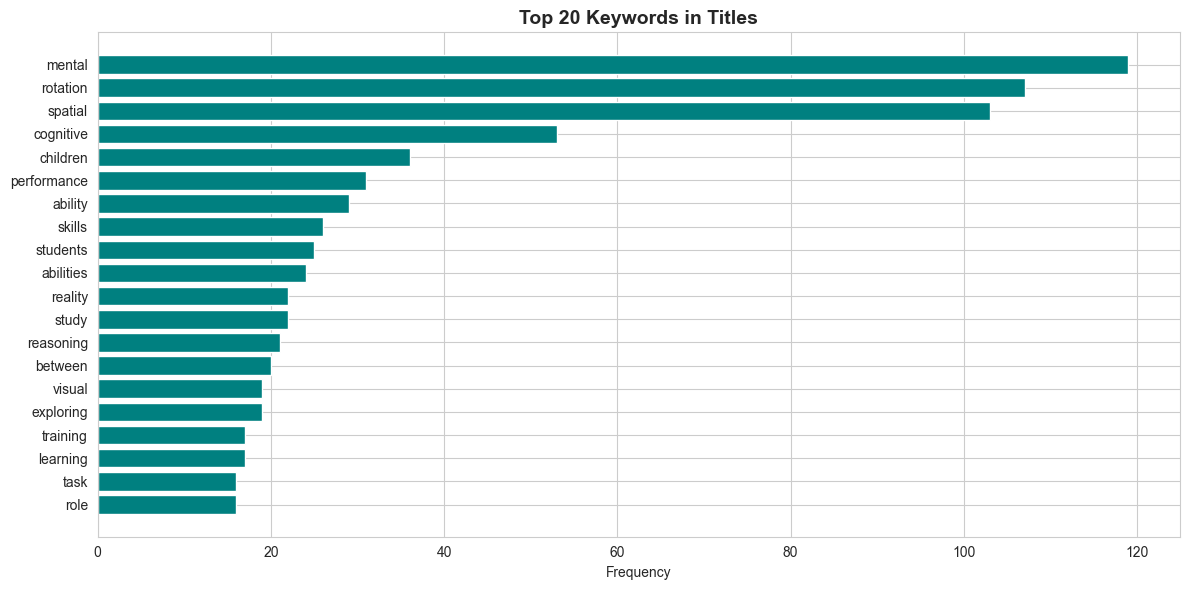

In [6]:
# Extract keywords from titles
all_titles = ' '.join(df['title'].astype(str).str.lower())

# Common stop words to exclude
stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
              'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'were', 'be', 
              'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 
              'would', 'could', 'should', 'may', 'might', 'can', 'this', 'that', 
              'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'what', 
              'which', 'who', 'when', 'where', 'why', 'how', 'n/a'}

# Extract words
words = re.findall(r'\b[a-z]{4,}\b', all_titles)
words = [w for w in words if w not in stop_words]

# Count frequencies
word_counts = Counter(words).most_common(20)

# Plot
words_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
plt.barh(words_df['Word'], words_df['Count'], color='teal')
plt.xlabel('Frequency')
plt.title('Top 20 Keywords in Titles', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Publication Sources

Top 10 Publication Sources:
domain
sciencedirect.com          42
link.springer.com          22
onlinelibrary.wiley.com    20
frontiersin.org            18
mdpi.com                   10
escholarship.org            9
tandfonline.com             9
researchsquare.com          6
researchgate.net            6
osf.io                      5
Name: count, dtype: int64


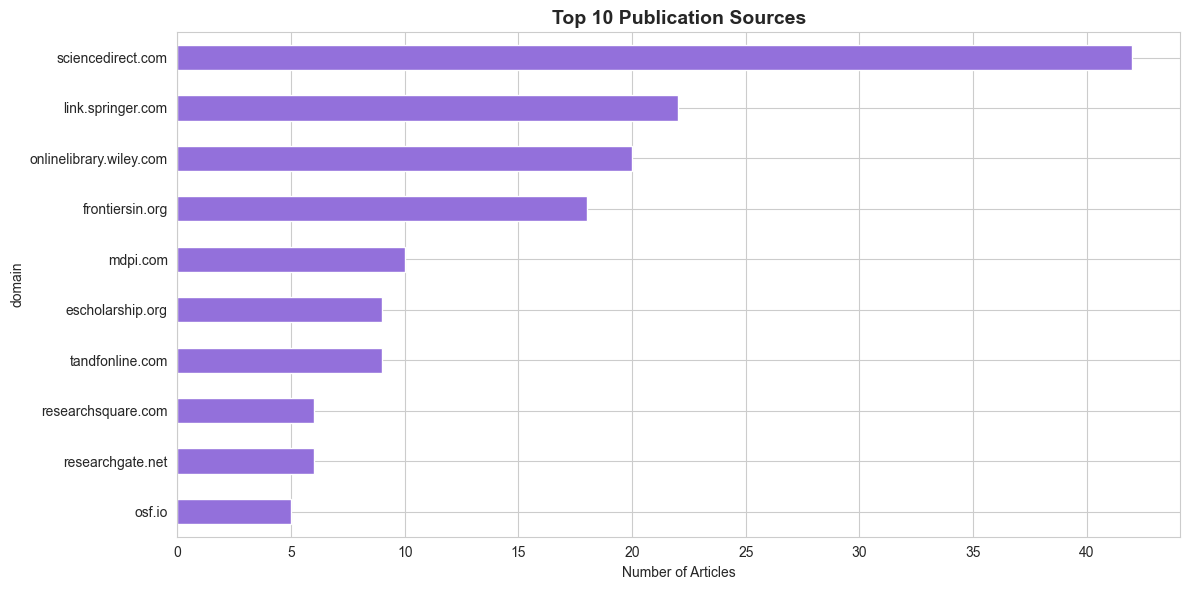

In [7]:
# Count publications by source
df['domain'] = df['url'].str.extract(r'https?://(?:www\.)?([^/]+)')
top_sources = df['domain'].value_counts().head(10)

print("Top 10 Publication Sources:")
print(top_sources)

# Plot
plt.figure(figsize=(12, 6))
top_sources.plot(kind='barh', color='mediumpurple')
plt.xlabel('Number of Articles')
plt.title('Top 10 Publication Sources', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Export Findings

In [8]:
# Export top cited papers to CSV
top_cited.to_csv('../results/top_cited_2024_2025.csv', index=False)
print("✓ Exported top cited papers to results/top_cited_2024_2025.csv")

# Export keyword analysis
words_df.to_csv('../results/keywords_2024_2025.csv', index=False)
print("✓ Exported keywords to results/keywords_2024_2025.csv")

✓ Exported top cited papers to results/top_cited_2024_2025.csv
✓ Exported keywords to results/keywords_2024_2025.csv
